In [108]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [109]:
adni = pd.read_csv(os.path.join("data", "ADNIMERGE_19Jun2025.csv"))
pet_df = pd.read_csv(os.path.join('data', 'CSF_COG_PET_data.csv'))
pet_df.shape

pet_pt_id = list(pet_df['PTID'])

pet_pt_id

C:\Users\huw\AppData\Local\Temp\ipykernel_27736\341732112.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni = pd.read_csv(os.path.join("data", "ADNIMERGE_19Jun2025.csv"))


['082_S_5282',
 '100_S_5280',
 '027_S_5277',
 '135_S_5275',
 '135_S_5269',
 '007_S_5265',
 '032_S_5263',
 '033_S_5259',
 '130_S_5258',
 '002_S_5256',
 '009_S_5252',
 '016_S_5251',
 '041_S_5244',
 '126_S_5243',
 '019_S_5242',
 '021_S_5237',
 '021_S_5236',
 '114_S_5234',
 '130_S_5231',
 '073_S_5227',
 '009_S_5224',
 '029_S_5219',
 '126_S_5214',
 '036_S_5210',
 '067_S_5205',
 '020_S_5203',
 '127_S_5200',
 '057_S_5199',
 '033_S_5198',
 '027_S_5197',
 '007_S_5196',
 '021_S_5194',
 '003_S_5187',
 '127_S_5185',
 '002_S_5178',
 '009_S_5176',
 '130_S_5175',
 '013_S_5171',
 '027_S_5169',
 '003_S_5165',
 '037_S_5162',
 '067_S_5159',
 '012_S_5157',
 '003_S_5154',
 '130_S_5142',
 '020_S_5140',
 '029_S_5135',
 '012_S_4545',
 '027_S_5127',
 '128_S_5123',
 '005_S_5119',
 '027_S_5118',
 '036_S_5112',
 '027_S_5109',
 '100_S_5106',
 '100_S_5102',
 '041_S_5100',
 '041_S_5097',
 '100_S_5096',
 '127_S_5095',
 '100_S_5091',
 '073_S_5090',
 '033_S_5087',
 '027_S_5083',
 '041_S_5082',
 '041_S_5078',
 '053_S_50

In [110]:
adni["PTID"] = adni["PTID"].astype(str).str.strip()
pet_pt_id = [str(pid).strip() for pid in pet_pt_id]

filtered_df = adni[adni["PTID"].isin(pet_pt_id)]

for i in filtered_df.columns:
    print(i)



RID
COLPROT
ORIGPROT
PTID
SITE
VISCODE
EXAMDATE
DX_bl
AGE
PTGENDER
PTEDUCAT
PTETHCAT
PTRACCAT
PTMARRY
APOE4
FDG
PIB
AV45
FBB
ABETA
TAU
PTAU
CDRSB
ADAS11
ADAS13
ADASQ4
MMSE
RAVLT_immediate
RAVLT_learning
RAVLT_forgetting
RAVLT_perc_forgetting
LDELTOTAL
DIGITSCOR
TRABSCOR
FAQ
MOCA
EcogPtMem
EcogPtLang
EcogPtVisspat
EcogPtPlan
EcogPtOrgan
EcogPtDivatt
EcogPtTotal
EcogSPMem
EcogSPLang
EcogSPVisspat
EcogSPPlan
EcogSPOrgan
EcogSPDivatt
EcogSPTotal
FLDSTRENG
FSVERSION
IMAGEUID
Ventricles
Hippocampus
WholeBrain
Entorhinal
Fusiform
MidTemp
ICV
DX
mPACCdigit
mPACCtrailsB
EXAMDATE_bl
CDRSB_bl
ADAS11_bl
ADAS13_bl
ADASQ4_bl
MMSE_bl
RAVLT_immediate_bl
RAVLT_learning_bl
RAVLT_forgetting_bl
RAVLT_perc_forgetting_bl
LDELTOTAL_BL
DIGITSCOR_bl
TRABSCOR_bl
FAQ_bl
mPACCdigit_bl
mPACCtrailsB_bl
FLDSTRENG_bl
FSVERSION_bl
IMAGEUID_bl
Ventricles_bl
Hippocampus_bl
WholeBrain_bl
Entorhinal_bl
Fusiform_bl
MidTemp_bl
ICV_bl
MOCA_bl
EcogPtMem_bl
EcogPtLang_bl
EcogPtVisspat_bl
EcogPtPlan_bl
EcogPtOrgan_bl
EcogPtDiva

In [111]:
bl_df = filtered_df[filtered_df["M"] == 0]
sixm_df = filtered_df[filtered_df["M"] == 6]
twelvem_df = filtered_df[filtered_df["M"] == 12]
twentyfourm_df = filtered_df[filtered_df["M"] == 24]
thirtysixm_df = filtered_df[filtered_df["M"] == 36]
fortyeightm_df = filtered_df[filtered_df["M"] == 48]


In [112]:
pt_cals = ["PTID","PTGENDER" ,"AGE", "M", "Gender", "PTRACCAT", "PTEDUCAT", "APOE4"]

bl_cog_data = ["DX_bl", "EcogSPPlan_bl", "EcogPtMem_bl", "EcogPtLang_bl", "EcogPtVisspat_bl", "EcogPtPlan_bl", "EcogPtOrgan_bl", 
               "EcogPtDivatt_bl", "EcogPtTotal_bl", "EcogSPMem_bl", "EcogSPLang_bl", "EcogSPVisspat_bl", "EcogSPOrgan_bl", "EcogSPDivatt_bl", "RAVLT_learning_bl", "MOCA_bl", 
               "ADAS11_bl","ADAS13_bl", "ADASQ4_bl", "MMSE_bl", "RAVLT_immediate_bl", "RAVLT_forgetting_bl", "RAVLT_perc_forgetting_bl",
               "TRABSCOR_bl"]

followup_cog_data = ["DX","EcogSPPlan", "EcogPtMem", "EcogPtLang", "EcogPtVisspat", "EcogPtPlan", "EcogPtOrgan", 
                     "EcogPtDivatt", "EcogPtTotal", "EcogSPMem", "EcogSPLang", "EcogSPVisspat", "EcogSPOrgan", "EcogSPDivatt", "RAVLT_learning", "MOCA","ADAS11",
                     "ADAS13", "ADASQ4", "MMSE", "RAVLT_immediate", "RAVLT_forgetting", "RAVLT_perc_forgetting", "TRABSCOR"]

# remove digitscore_bl because nobody has this test
# 6m nobody has LDELTOTAL

In [113]:
bl_df = bl_df.filter(pt_cals + bl_cog_data)

sixm_df = sixm_df.filter(["PTID", "M"] + followup_cog_data)
sixm_df.rename(columns={col: f"{col}_{sixm_df['M'].iloc[0]}" for col in followup_cog_data}, inplace=True)

twelvem_df = twelvem_df.filter(["PTID", "M"] + followup_cog_data)
twelvem_df.rename(columns={col: f"{col}_{twelvem_df['M'].iloc[0]}" for col in followup_cog_data}, inplace=True)

twentyfourm_df = twentyfourm_df.filter(["PTID", "M"] + followup_cog_data)
twentyfourm_df.rename(columns={col: f"{col}_{twentyfourm_df['M'].iloc[0]}" for col in followup_cog_data}, inplace=True)

thirtysixm_df = thirtysixm_df.filter(["PTID", "M"] + followup_cog_data)
thirtysixm_df.rename(columns={col: f"{col}_{thirtysixm_df['M'].iloc[0]}" for col in followup_cog_data}, inplace=True)

fortyeightm_df = fortyeightm_df.filter(["PTID", "M"] + followup_cog_data)
fortyeightm_df.rename(columns={col: f"{col}_{fortyeightm_df['M'].iloc[0]}" for col in followup_cog_data}, inplace=True)



In [114]:
bl_6m_df = bl_df.merge(sixm_df, on = "PTID")
bl_6m_df = bl_6m_df.drop(["M_x", "M_y"], axis= 1)
bl_6m_12m_df = bl_6m_df.merge(twelvem_df, on = "PTID")
bl_6m_12m_df = bl_6m_12m_df.drop(["M"], axis= 1)
bl_6m_12m_24m = bl_6m_12m_df.merge(twentyfourm_df, on = "PTID")
bl_6m_12m_24m = bl_6m_12m_24m.drop(["M"], axis= 1)
bl_6m_12m_24m_36m = bl_6m_12m_24m.merge(thirtysixm_df, on = "PTID")
bl_6m_12m_24m_36m = bl_6m_12m_24m_36m.drop(["M"], axis= 1)
full_df = bl_6m_12m_24m_36m.merge(fortyeightm_df, on = "PTID")
full_df = full_df.drop(["M"], axis= 1)

In [115]:
full_df.dropna()

,PTID,PTGENDER,AGE,PTRACCAT,PTEDUCAT,APOE4,DX_bl,EcogSPPlan_bl,EcogPtMem_bl,EcogPtLang_bl,...,RAVLT_learning_48,MOCA_48,ADAS11_48,ADAS13_48,ADASQ4_48,MMSE_48,RAVLT_immediate_48,RAVLT_forgetting_48,RAVLT_perc_forgetting_48,TRABSCOR_48
0,127_S_4928,Male,77.8,White,16,1.0,LMCI,3.25,3.37500,1.44444,...,5.0,18.0,17.0,26.0,8.0,22.0,34.0,9.0,100.0000,73.0
2,011_S_4893,Female,68.1,White,12,1.0,EMCI,1.60,3.12500,2.33333,...,1.0,23.0,14.0,25.0,10.0,24.0,29.0,6.0,100.0000,93.0
3,126_S_4891,Male,59.7,White,15,2.0,EMCI,1.40,1.87500,2.11111,...,3.0,27.0,5.0,10.0,4.0,27.0,21.0,4.0,80.0000,93.0
6,052_S_4885,Male,75.0,White,20,1.0,LMCI,1.40,2.87500,1.00000,...,2.0,19.0,24.0,31.0,7.0,21.0,30.0,7.0,100.0000,51.0
7,018_S_4868,Male,77.1,White,12,2.0,EMCI,1.00,3.25000,2.77778,...,2.0,18.0,15.0,25.0,8.0,24.0,26.0,6.0,100.0000,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,037_S_4706,Male,60.7,White,14,1.0,EMCI,1.80,3.12500,2.44444,...,2.0,23.0,8.0,13.0,5.0,29.0,27.0,1.0,14.2857,95.0
149,135_S_4722,Female,68.0,White,18,0.0,LMCI,1.00,2.12500,1.66667,...,5.0,30.0,4.0,8.0,4.0,30.0,62.0,3.0,20.0000,71.0
150,135_S_4723,Female,69.4,White,18,0.0,LMCI,1.00,1.62500,1.11111,...,8.0,30.0,4.0,6.0,2.0,30.0,55.0,3.0,20.0000,41.0
151,053_S_4813,Male,67.6,White,16,0.0,EMCI,1.00,1.75000,1.22222,...,10.0,27.0,4.0,4.0,0.0,27.0,52.0,3.0,21.4286,68.0


In [116]:
pet = pd.read_csv("data/CSF_COG_PET_data.csv")
pet = pet.drop(["PTGENDER","AGE", "PTRACCAT", "PTEDUCAT", "DX_bl","EXAMDATE",
    "EXAMDATE_bl",
    "DX",
    "MMSE_bl",
    "EcogPtTotal_bl",
    "FHQMOM",
    "FHQMOMAD",
    "FHQDAD",
    "FHQDADAD",
    "LDELTOTAL_BL",
    "mPACCdigit_bl",
    "mPACCtrailsB_bl",
    "RAVLT_immediate_bl",
    "RAVLT_learning_bl",
    "RAVLT_forgetting_bl",
    "RAVLT_perc_forgetting_bl"], axis=1)
full_df = full_df.merge(pet, on="PTID",)

In [117]:
full_df
for i in full_df.columns:
    print(i)

PTID
PTGENDER
AGE
PTRACCAT
PTEDUCAT
APOE4
DX_bl
EcogSPPlan_bl
EcogPtMem_bl
EcogPtLang_bl
EcogPtVisspat_bl
EcogPtPlan_bl
EcogPtOrgan_bl
EcogPtDivatt_bl
EcogPtTotal_bl
EcogSPMem_bl
EcogSPLang_bl
EcogSPVisspat_bl
EcogSPOrgan_bl
EcogSPDivatt_bl
RAVLT_learning_bl
MOCA_bl
ADAS11_bl
ADAS13_bl
ADASQ4_bl
MMSE_bl
RAVLT_immediate_bl
RAVLT_forgetting_bl
RAVLT_perc_forgetting_bl
TRABSCOR_bl
DX_6
EcogSPPlan_6
EcogPtMem_6
EcogPtLang_6
EcogPtVisspat_6
EcogPtPlan_6
EcogPtOrgan_6
EcogPtDivatt_6
EcogPtTotal_6
EcogSPMem_6
EcogSPLang_6
EcogSPVisspat_6
EcogSPOrgan_6
EcogSPDivatt_6
RAVLT_learning_6
MOCA_6
ADAS11_6
ADAS13_6
ADASQ4_6
MMSE_6
RAVLT_immediate_6
RAVLT_forgetting_6
RAVLT_perc_forgetting_6
TRABSCOR_6
DX_12
EcogSPPlan_12
EcogPtMem_12
EcogPtLang_12
EcogPtVisspat_12
EcogPtPlan_12
EcogPtOrgan_12
EcogPtDivatt_12
EcogPtTotal_12
EcogSPMem_12
EcogSPLang_12
EcogSPVisspat_12
EcogSPOrgan_12
EcogSPDivatt_12
RAVLT_learning_12
MOCA_12
ADAS11_12
ADAS13_12
ADASQ4_12
MMSE_12
RAVLT_immediate_12
RAVLT_forgetting_12
RA

In [118]:
timepoints = np.array([0, 6, 12, 24, 36, 48]).reshape(-1, 1)
tests_to_fit = [
    "EcogSPPlan_bl", "EcogPtMem_bl", "EcogPtLang_bl", "EcogPtVisspat_bl", "EcogPtPlan_bl",
    "EcogPtOrgan_bl", "EcogPtDivatt_bl", "EcogPtTotal_bl", "EcogSPMem_bl", "EcogSPLang_bl",
    "EcogSPVisspat_bl", "EcogSPOrgan_bl", "EcogSPDivatt_bl", "RAVLT_learning_bl", "MOCA_bl",
    "ADAS11_bl", "ADAS13_bl", "ADASQ4_bl", "MMSE_bl", "RAVLT_immediate_bl",
    "RAVLT_forgetting_bl", "RAVLT_perc_forgetting_bl", "TRABSCOR_bl"
]

invert_slope_tests = {
    "EcogSPPlan_bl", "EcogPtMem_bl", "EcogPtLang_bl", "EcogPtVisspat_bl", "EcogPtPlan_bl",
    "EcogPtOrgan_bl", "EcogPtDivatt_bl", "EcogPtTotal_bl", "EcogSPMem_bl", "EcogSPLang_bl",
    "EcogSPVisspat_bl", "EcogSPOrgan_bl", "EcogSPDivatt_bl", 
    "ADAS11_bl", "ADAS13_bl", "ADASQ4_bl",
    "RAVLT_forgetting_bl", "RAVLT_perc_forgetting_bl"
}


In [120]:
# Fit linear model for each test and store slope
for test in tests_to_fit:
    slopes = []
    # Generate the column names for this test across all timepoints
    timepoint_cols = [test] + [test.replace("_bl", f"_{t}") for t in [6, 12, 24, 36, 48]]

    for _, row in full_df.iterrows():
        scores = [row.get(col, np.nan) for col in timepoint_cols]
        
        # Handle missing data: skip if too many NaNs
        if sum(pd.isnull(scores)) > 2:
            slopes.append(np.nan)
            continue
        
        try:
            valid_idx = [i for i, v in enumerate(scores) if pd.notnull(v)]
            if len(valid_idx) < 2:
                slopes.append(np.nan)
                continue
            
            X = timepoints[valid_idx]
            y = np.array([scores[i] for i in valid_idx])
            
            model = LinearRegression()
            model.fit(X, y)
            slope = model.coef_[0]
            if test in invert_slope_tests:
                slope = -slope
            slopes.append(slope)
        except:
            slopes.append(np.nan)

    # Store slope in dataframe
    slope_colname = test.replace("_bl", "_LR")
    full_df[slope_colname] = slopes

In [134]:
full_df = full_df.dropna()

Some see an increase in test score for cognitve decline, simply because of the desgin of the test. We will multiply by -1 those that this is true for to account for this.

In [135]:
import mrmr
import re

In [151]:
all_suvr_cols = [col for col in pet.columns if col.startswith("SUVr")]

# Exclude cerebellum columns using regex
suvr_cols = [col for col in pet.columns if col.startswith("SUVr") and not re.search(r'cerebellum', col, re.IGNORECASE)]

print(f"Total SUVr columns: {len(all_suvr_cols)}")
print(f"SUVr columns excluding cerebellum: {len(suvr_cols)}")

Total SUVr columns: 166
SUVr columns excluding cerebellum: 148


In [152]:
X = full_df[suvr_cols]


test_slopes = [col for col in full_df.columns if re.search(r'_LR$', col)]

from collections import defaultdict

important_features = defaultdict(list)

for i in test_slopes:
    y = full_df[i]
    valid_idx = y.notnull() & X.notnull().all(axis=1)
    if valid_idx.sum() < 20:
        continue

    X_valid = X[valid_idx]
    y_valid = y[valid_idx]

    features = mrmr.mrmr_regression(X_valid, y_valid, K=20)
    important_features[i] = features

100%|██████████| 20/20 [00:00<00:00, 35.02it/s]


In [153]:
len(test_slopes)

23

In [154]:
from collections import Counter

all_selected = sum(important_features.values(), [])
most_common_regions = Counter(all_selected).most_common(20)
print(most_common_regions)

[('SUVr_Raphe_D.nii', 13), ('SUVr_LC_L.nii', 13), ('SUVr_Temporal_Inf_R.nii', 13), ('SUVr_OFClat_L.nii', 10), ('SUVr_VTA_R.nii', 10), ('SUVr_OFClat_R.nii', 10), ('SUVr_Temporal_Pole_Mid_R.nii', 9), ('SUVr_Temporal_Pole_Sup_R.nii', 9), ('SUVr_SupraMarginal_R.nii', 9), ('SUVr_Raphe_M.nii', 9), ('SUVr_Thal_PuL_L.nii', 8), ('SUVr_Temporal_Pole_Mid_L.nii', 8), ('SUVr_Thal_VPL_L.nii', 8), ('SUVr_Temporal_Mid_R.nii', 8), ('SUVr_SN_pc_R.nii', 7), ('SUVr_Precuneus_L.nii', 7), ('SUVr_Red_N_L.nii', 7), ('SUVr_ACC_sub_L.nii', 7), ('SUVr_Red_N_R.nii', 7), ('SUVr_Thal_IL_L.nii', 7)]


In [ ]:
slope_to_domain = {

    "EcogPtMem_LR": "memory",
    "EcogSPMem_LR": "memory",
    "RAVLT_learning_LR": "memory",
    "RAVLT_immediate_LR": "memory",
    "RAVLT_forgetting_LR": "memory",
    "RAVLT_perc_forgetting_LR": "memory",

    "EcogPtLang_LR": "language",
    "EcogSPLang_LR": "language",

    "EcogPtVisspat_LR": "visuospatial",
    "EcogSPVisspat_LR": "visuospatial",

    "EcogPtPlan_LR": "executive_function",
    "EcogPtOrgan_LR": "executive_function",
    "EcogPtDivatt_LR": "executive_function",
    "EcogSPPlan_LR": "executive_function",
    "EcogSPOrgan_LR": "executive_function",
    "EcogSPDivatt_LR": "executive_function",
    "TRABSCOR_LR": "executive_function",

    "EcogPtTotal_LR": "global",
    "MOCA_LR": "global",
    "MMSE_LR": "global",
    "ADAS11_LR": "global",
    "ADAS13_LR": "global",
    "ADASQ4_LR": "global",
}

In [156]:
domain_feature_counts = defaultdict(Counter)

for test, features in important_features.items():
    domain = slope_to_domain.get(test)
    if domain is not None:
        domain_feature_counts[domain].update(features)

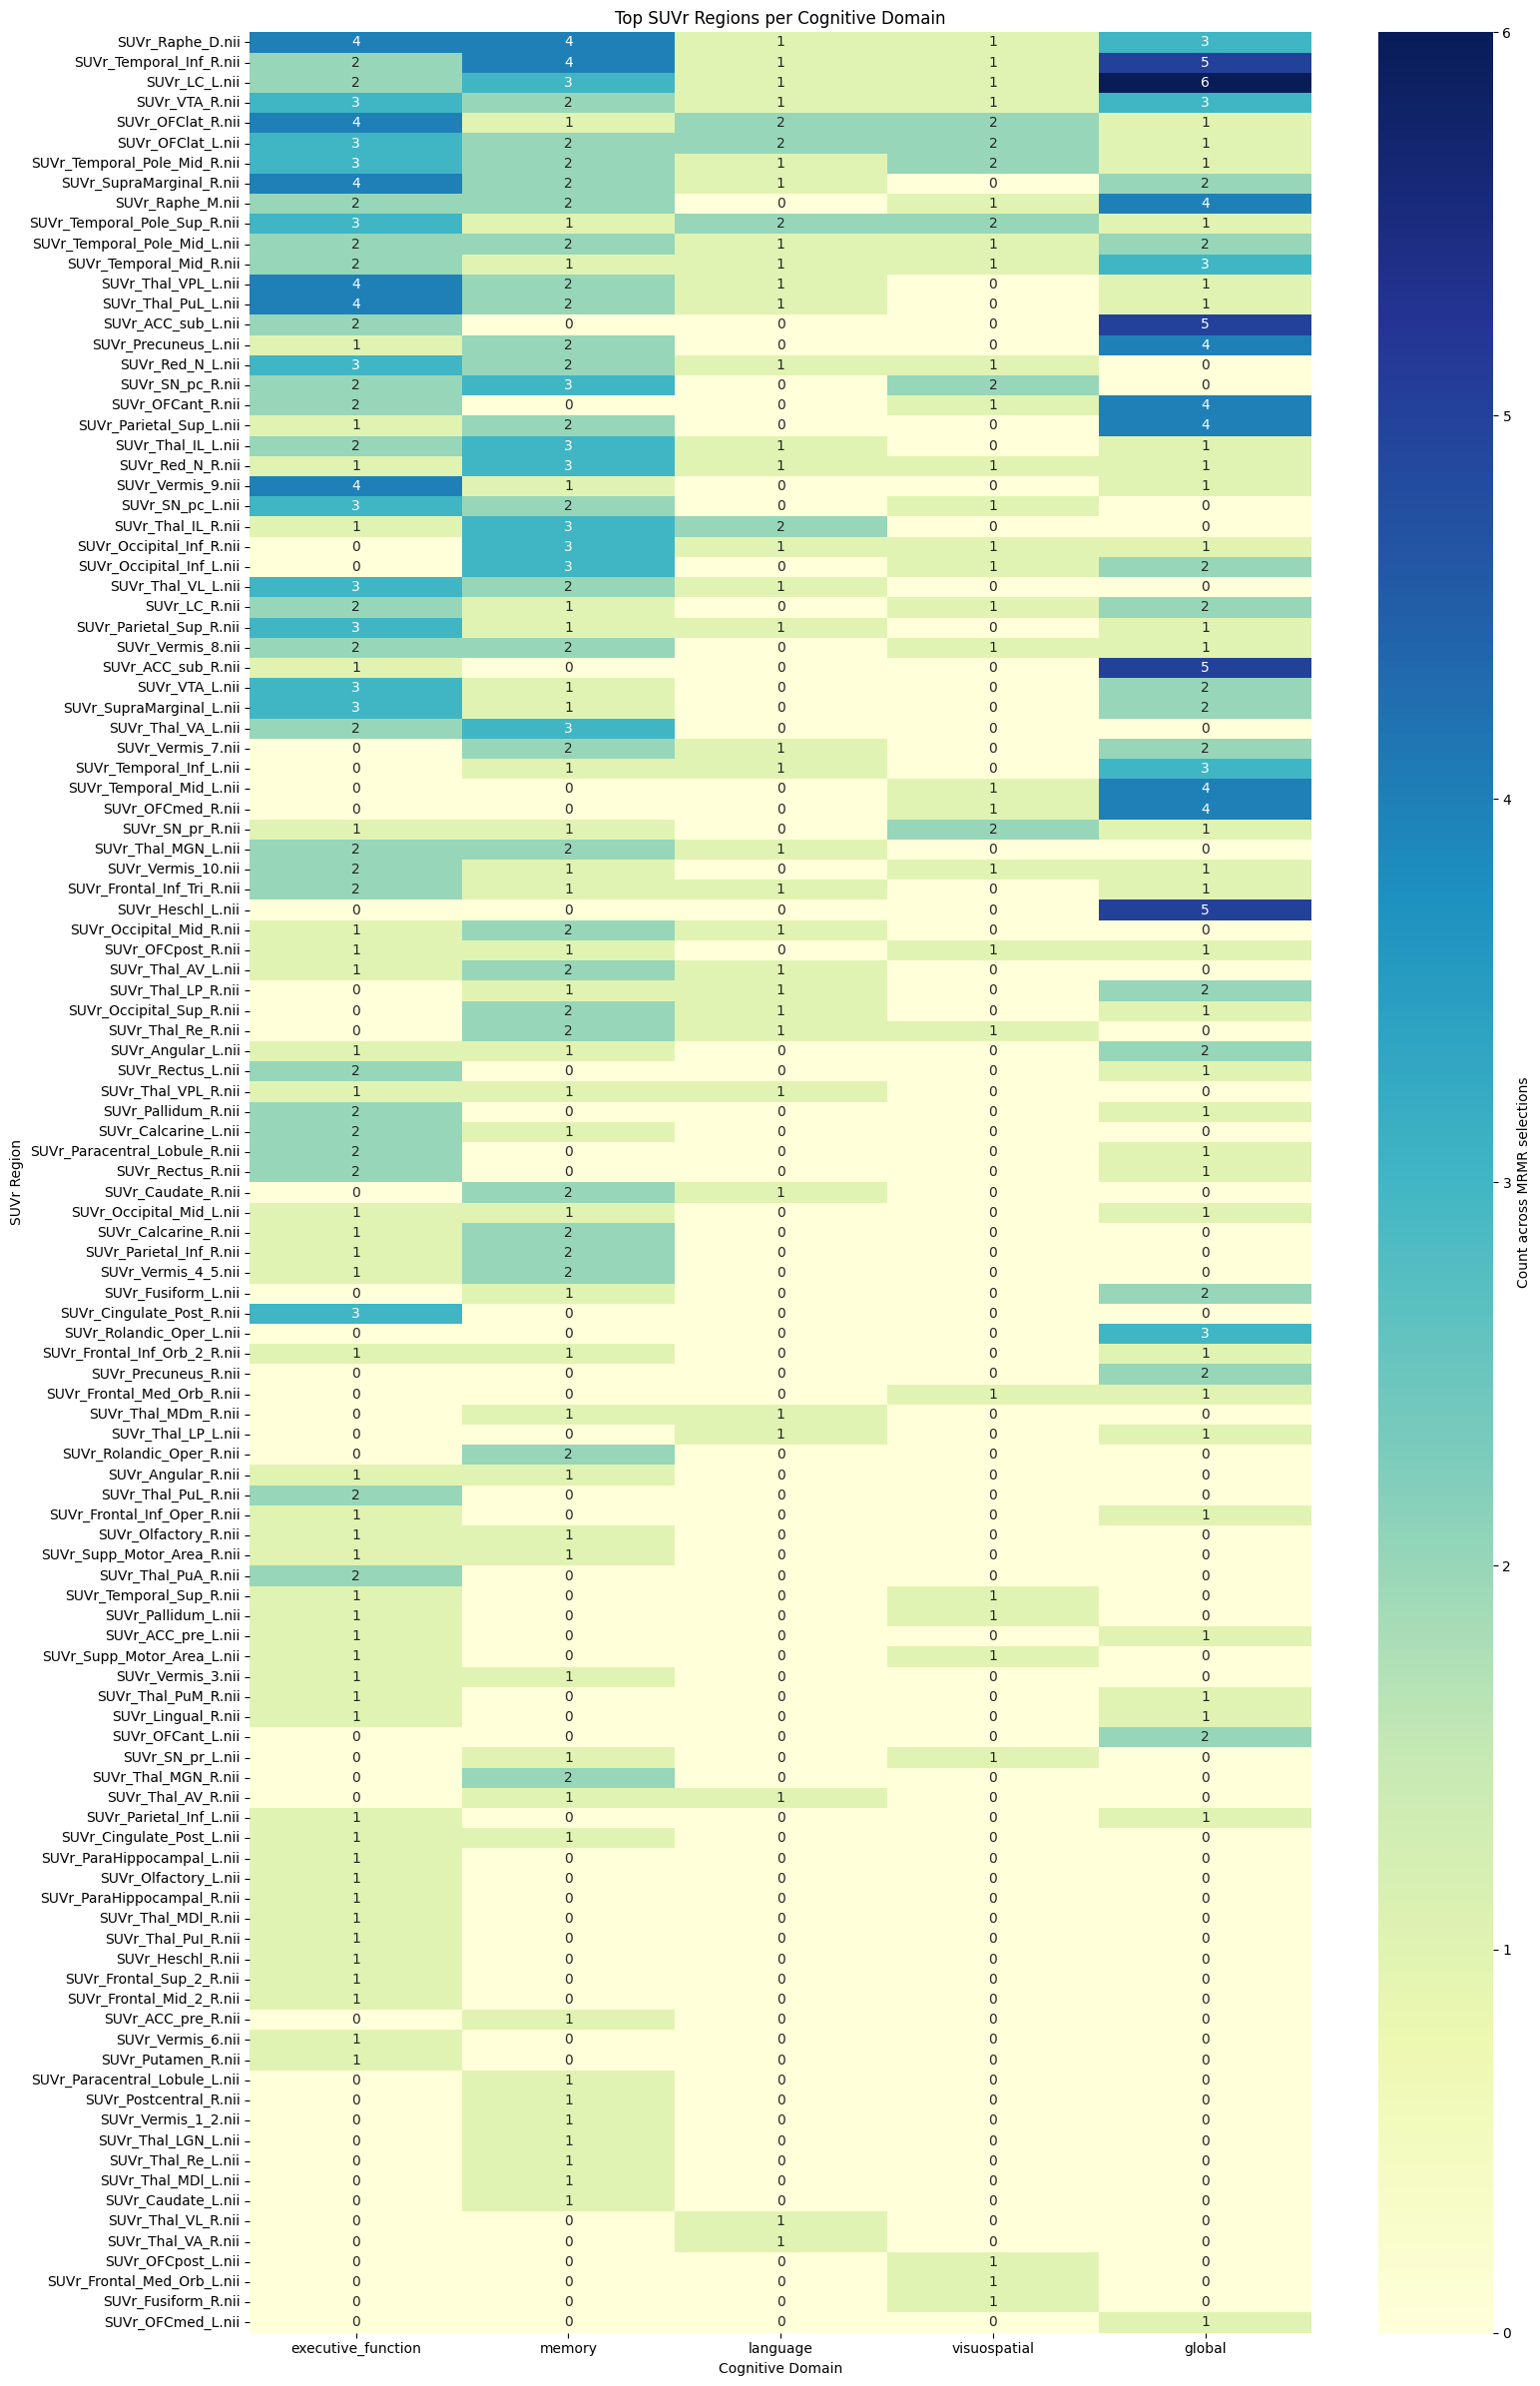

In [170]:
heatmap_df = pd.DataFrame(domain_feature_counts).fillna(0).astype(int)

top_features = heatmap_df.sum(axis=1).sort_values(ascending=False).head(148).index
heatmap_df = heatmap_df.loc[top_features]

plt.figure(figsize=(16, 24))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", cbar_kws={"label": "Count across MRMR selections"})
plt.title("Top SUVr Regions per Cognitive Domain")
plt.ylabel("SUVr Region")
plt.xlabel("Cognitive Domain")
plt.tight_layout()
plt.show()